2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

*   Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
*   Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
df = pd.read_csv('/content/India_crops_preprocessed_categorized_wtout_outliers.csv')

3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [3]:
num_cl = range(1, 20) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [4]:
#keeping only the continuous variables to pass through the clustering algorithm

df_cv = df[['Area','Production','Yield']]

In [5]:
df_cv.head()

,Area,Production,Yield
0,2439.6,3415.0,1.40
1,1626.4,2277.0,1.40
2,4147.0,3060.0,0.74
3,4147.0,2660.0,0.64
4,4153.0,3120.0,0.75


In [6]:
score = [kmeans[i].fit(df_cv).score(df_cv) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[-2393914080987.5137,
 -835057293984.5826,
 -484359817900.53894,
 -352768769447.7142,
 -277929463234.1746,
 -230379851323.13794,
 -195568022855.6006,
 -169308045286.2883,
 -149381136079.4828,
 -135133977089.28537,
 -122268179206.8857,
 -111881733089.1256,
 -102867359881.7309,
 -95318676889.8818,
 -89453629926.60332,
 -83751679141.82709,
 -78694447447.44391,
 -74276125498.46655,
 -70353428295.22699]

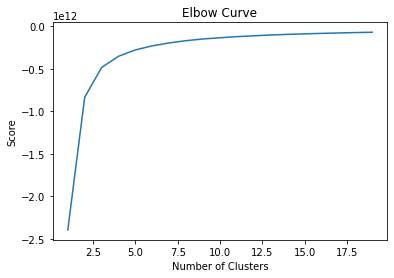

In [7]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

*   Explain why you chose that number in a markdown cell.



**Answer:** In this example, there's a large jump from one to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is four.

5. Run the k-means algorithm.

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [9]:
# Fit the k-means object to the data.

kmeans.fit(df_cv)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [10]:
df['clusters'] = kmeans.fit_predict(df_cv)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
df.head()

,Unnamed: 0,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Area_Category,Production_Category,Yield_Category,clusters
0,0,Andaman and Nicobar Island,Nicobars,Arecanut,2007,Kharif,2439.6,3415.0,1.40,Large Land,Regular Production,Regular Yield,2
1,1,Andaman and Nicobar Island,Nicobars,Arecanut,2007,Rabi,1626.4,2277.0,1.40,Large Land,Regular Production,Regular Yield,2
2,2,Andaman and Nicobar Island,Nicobars,Arecanut,2008,Autumn,4147.0,3060.0,0.74,Large Land,Regular Production,Regular Yield,2
3,3,Andaman and Nicobar Island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,Large Land,Regular Production,Regular Yield,2
4,4,Andaman and Nicobar Island,Nicobars,Arecanut,2009,Autumn,4153.0,3120.0,0.75,Large Land,Regular Production,Regular Yield,2


In [12]:
df['clusters'].value_counts()

0    173199
2     36580
1     16640
3      7382
Name: clusters, dtype: int64

7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

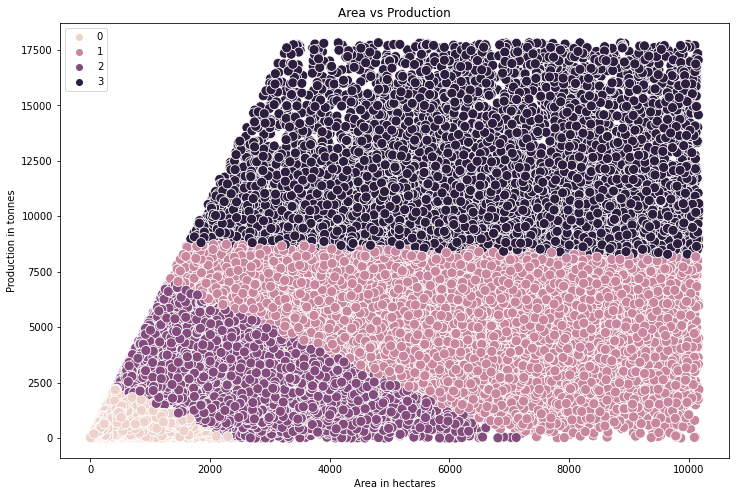

In [13]:
# Plot the clusters for the "Production" and "Area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Area'], y=df['Production'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Area vs Production')
plt.xlabel('Area in hectares') # Label x-axis.
plt.ylabel('Production in tonnes') # Label y-axis.
plt.show()

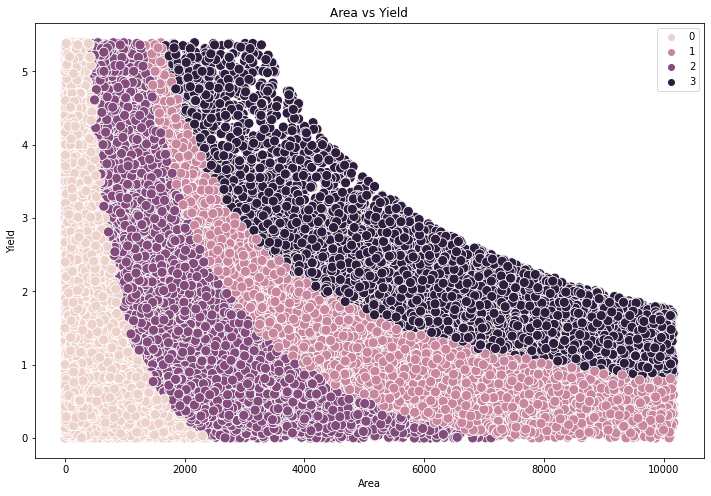

In [14]:
# Plot the clusters for the "Area" and "Yield" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Area'], y=df['Yield'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.title('Area vs Yield')
plt.xlabel('Area') 
plt.ylabel('Yield') 
plt.show()

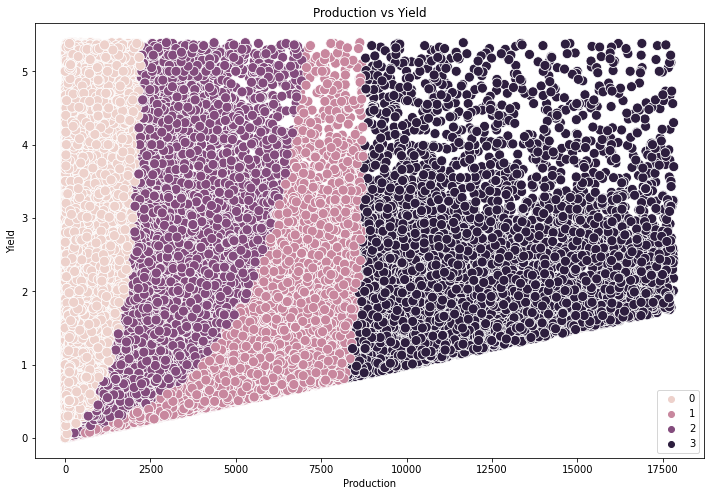

In [15]:
# Plot the clusters for the "Production" and "Yield" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Production'], y=df['Yield'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.title('Production vs Yield')
plt.xlabel('Production') 
plt.ylabel('Yield') 
plt.show()

8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

*   Note down your thoughts in a markdown cell.





**Area vs Production:** This visualization is too complex to comprehend, and can be further interpreted in the next step, after exploring the descriptive statistics for each cluster. 

**Area vs Yield:** There are polynomial downward trends between Area and Yield for all the four clusters. The larger the maximum area for a particular cluster, the longer the polynomial downward curve. 

Only this information could be gleaned from this visualization.



9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [16]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark violet'
df.loc[df['clusters'] == 2, 'cluster'] = 'violet'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [17]:
df.groupby('cluster').agg({'Area':['mean', 'median'], 
                         'Production':['mean', 'median'], 
                         'Yield':['mean', 'median']})

Area            Production              Yield       
                    mean  median          mean   median      mean median
cluster                                                                 
dark violet  6351.762192  6313.5  11912.848009  11345.5  2.155129   1.90
light pink    295.351032   122.0    244.316016    100.0  1.057762   0.79
purple       5857.540120  5751.0   5026.492368   5017.5  1.060771   0.86
violet       2442.750675  2241.0   2218.891471   2000.0  1.184163   0.89

*   The dark violet cluster has the best stats, and most importantly, the highest median yield. The median area is 6313.5 hectares and median production is 11345.5 tonnes, which are respectively the largest medain area and largest median production amongst the four groups. 

*   The violet cluster has the second-highest median yield. The median area is 2241 hectares and median production is 2000 tonnes. Both the area and production are third-highest amongst the 4 groups, but in terms of yield, this cluster is ahead in rank than the violet and light pink cluster.  

*   The purple cluster has the third-highest median yield. In terms of area and production, it is the second-largest amongst the 4 clusters. But in terms of yield, it is third. 

*   The light pink cluster has the smallest median yield, as well as smallest median area and smallest production. 



10. Propose what these results could be useful for in future steps of an analytics pipeline.

**Answer:** For further exploration, first I would like to find out the area, production and yield range (min and max) for each cluster. 

In [18]:
df.groupby('cluster').agg({'Area':['min', 'max'], 
                         'Production':['min', 'max'], 
                         'Yield':['min', 'max']})

Area          Production          Yield      
                 min      max        min      max   min   max
cluster                                                      
dark violet  1680.00  10169.0     8188.0  17823.0  0.81  5.39
light pink      0.06   2385.0        0.0   2249.0  0.00  5.39
purple       1341.00  10168.0        0.0   8742.0  0.00  5.39
violet        428.00   7116.0        0.0   6943.0  0.00  5.39

Apparently the algorithm grouped the data into clusters based on the ranges of area size and production quantity combined. 

The dark violet and purple clusters have the largest production quantities perhaps because these clusters have the largest areas within their range. 

Although these statistics add evidence to the hypothesis that larger areas yield to larger productions, our visualizations above show that this is only partially true. While clusters having larger areas within their range also have larger productions in their production range, there are many instances where large areas produced quantities equal to small areas. 

**Conclusion:** The descriptive statistics charts and Area vs Production and Area vs Yield visualizations might be important elements to attach in our final project deliverable. 